In [2]:
import neurolab as nl
import matplotlib.pyplot as plt 

#perceptron tabanlı bir sınıflandırıcı implementasyonu yapacağız (supervised learning örneği)

In [3]:
input = [[0, 0], [0, 1], [1, 0], [1, 1]]
target = [[0], [0], [0], [1]]

net = nl.net.newp([[0,1], [0,1]], 1) #2 adet girdi, 1 adet nöron ile oluşturulan ağ yapısı
                  
error_progress = net.train(input, target, epochs = 100, show = 10, lr = 0.1) #Delta Rule öğrenme kuralı uygulaması

The goal of learning is reached


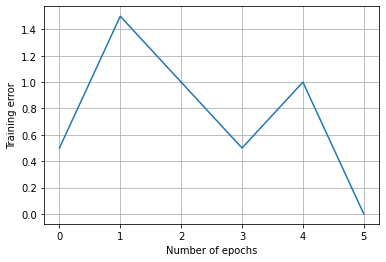

In [4]:
plt.figure()
plt.plot(error_progress)
plt.xlabel('Number of epochs')
plt.ylabel('Training error')
plt.grid()
plt.show()

In [6]:
#single-layer (tek katmanlı) sinir ağları

import numpy as np
import matplotlib.pyplot as plt
import neurolab as nl

input_data = np.loadtxt('data/neural_simple.txt',delimiter = ',')

In [7]:
input_data

array([[2. , 4. , 0. , 0. ],
       [1.5, 3.9, 0. , 0. ],
       [2.2, 4.1, 0. , 0. ],
       [1.9, 4.7, 0. , 0. ],
       [5.4, 2.2, 0. , 1. ],
       [4.3, 7.1, 0. , 1. ],
       [5.8, 4.9, 0. , 1. ],
       [6.5, 3.2, 0. , 1. ],
       [3. , 2. , 1. , 0. ],
       [2.5, 0.5, 1. , 0. ],
       [3.5, 2.1, 1. , 0. ],
       [2.9, 0.3, 1. , 0. ],
       [6.5, 8.3, 1. , 1. ],
       [3.2, 6.2, 1. , 1. ],
       [4.9, 7.8, 1. , 1. ],
       [2.1, 4.8, 1. , 1. ]])

In [8]:
data = input_data[:, 0:2]
labels = input_data[:, 2:]

Text(0.5, 1.0, 'Input Data')

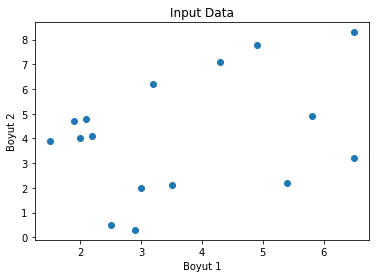

In [10]:
plt.figure()
plt.scatter(data[:,0],data[:,1])
plt.xlabel('Boyut 1')
plt.ylabel('Boyut 2')
plt.title('Input Data')

In [11]:
dim1_min, dim1_max = data[:,0].min(), data[:,0].max()
dim2_min, dim2_max = data[:,1].min(), data[:,0].max()

In [12]:
nn_output_layer = labels.shape[1]

In [13]:
dim1 = [dim1_min, dim1_max]
dim2 = [dim2_min, dim2_max]
neural_net = nl.net.newp([dim1, dim2], nn_output_layer)

In [14]:
error = neural_net.train(data, labels, epochs = 200, show=20, lr = 0.01)

Epoch: 20; Error: 4.0;
Epoch: 40; Error: 4.0;
Epoch: 60; Error: 4.0;
Epoch: 80; Error: 4.0;
Epoch: 100; Error: 4.0;
Epoch: 120; Error: 4.0;
Epoch: 140; Error: 4.0;
Epoch: 160; Error: 4.0;
Epoch: 180; Error: 4.0;
Epoch: 200; Error: 4.0;
The maximum number of train epochs is reached


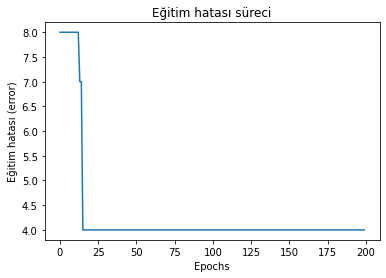

In [18]:
plt.figure()
plt.plot(error)
plt.xlabel('Epochs')
plt.ylabel('Eğitim hatası (error)')
plt.title('Eğitim hatası süreci')
plt.show()

In [17]:
print('\nTest results: ')
data_test = [[1.5 , 3.2], [3.6 , 1.7], [3.6 , 5.7], [1.6 , 3.9]] 
for item in data_test:
    print(item, '-->', neural_net.sim([item])[0])
    


Test results: 
[1.5, 3.2] --> [1. 0.]
[3.6, 1.7] --> [1. 0.]
[3.6, 5.7] --> [1. 1.]
[1.6, 3.9] --> [1. 0.]


In [19]:
#multi-layer neural networks, y = 2X^2 + 8 

import numpy as np
import matplotlib.pyplot as plt
import neurolab as nl

min_val = -30
max_val = 30
num_points = 160
x = np.linspace(min_val, max_val, num_points)
y = 2 * np.square(x) + 8
y /= np.linalg.norm(y)

In [20]:
data = x.reshape(num_points, 1)
labels = y.reshape(num_points, 1)

Text(0.5, 1.0, 'Veri noktaları')

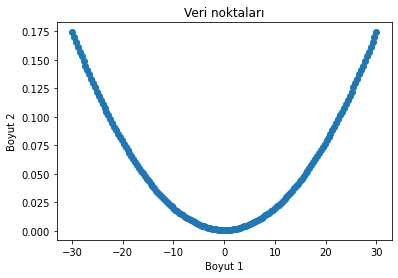

In [21]:
plt.figure()
plt.scatter(data, labels)
plt.xlabel('Boyut 1')
plt.ylabel('Boyut 2')
plt.title('Veri noktaları')

In [22]:
neural_net = nl.net.newff([[min_val, max_val]], [10,6,1])

In [23]:
neural_net.trainf = nl.train.train_gd 

In [24]:
error = neural_net.train(data, labels, epochs = 1000, show=100, goal=0.01)

Epoch: 100; Error: 4.473666485622534;
Epoch: 200; Error: 0.05350533189555899;
Epoch: 300; Error: 0.1657127495084043;
Epoch: 400; Error: 0.12550924925940155;
Epoch: 500; Error: 0.01911862796997861;
Epoch: 600; Error: 0.019551237132344985;
Epoch: 700; Error: 0.015724155543707888;
Epoch: 800; Error: 0.03256633023291001;
Epoch: 900; Error: 0.01896676662265217;
Epoch: 1000; Error: 0.020131672622404034;
The maximum number of train epochs is reached


In [25]:
output = neural_net.sim(data)
y_pred = output.reshape(num_points)

Text(0.5, 1.0, 'Eğitim Hatası Süreci')

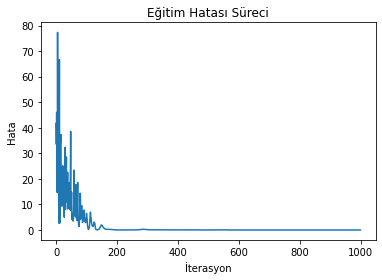

In [27]:
plt.figure()
plt.plot(error)
plt.xlabel('İterasyon')
plt.ylabel('Hata')
plt.title('Eğitim Hatası Süreci')

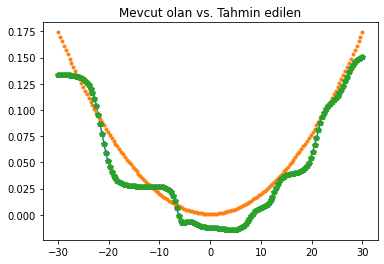

In [30]:
x_dense = np.linspace(min_val, max_val, num_points * 2)
y_dense_pred = neural_net.sim(x_dense.reshape(x_dense.size,1)).reshape(x_dense.size)
plt.figure()
plt.plot(x_dense, y_dense_pred, '-', x, y, '.', x, y_pred, 'p')
plt.title('Mevcut olan vs. Tahmin edilen')
plt.show()

Text(0.5, 1.0, 'Sigmoid Fonksiyonu')

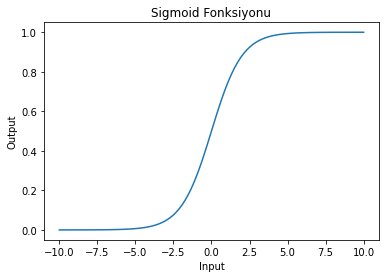

In [31]:
#aktivasyon fonksiyonu, sigmoid 

import numpy as np
import matplotlib.pyplot as plt

#-10 ile 10 arasında 100 veri noktası

input = np.linspace(-10,10,100)

#sigmoid fonksiyonu tanımlama

def sigmoid(X):
    val = 1/(1+np.exp(-X))
    return val

output = sigmoid(input)

plt.plot(input, output)
plt.xlabel("Input")
plt.ylabel("Output")
plt.title("Sigmoid Fonksiyonu")

In [45]:
import numpy as np

input_features = np.array([[1,0,0,1],[1,0,0,0],[0,0,1,1],
                         [0,1,0,0],[1,1,0,0],[0,0,1,1],
                         [0,0,0,1],[0,0,1,0]])

print(input_features)

[[1 0 0 1]
 [1 0 0 0]
 [0 0 1 1]
 [0 1 0 0]
 [1 1 0 0]
 [0 0 1 1]
 [0 0 0 1]
 [0 0 1 0]]


In [33]:
target_output = np.array([[1,1,0,0,1,1,0,0]])
target_output = target_output.reshape(8,1)
print(target_output.shape)

(8, 1)


In [34]:
target_output

array([[1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0]])

In [36]:
#ağırlıkları tanımlama
weights = np.array([[0.1],[0.2],[0.3],[0.4]])
print(weights.shape)
weights

(4, 1)


array([[0.1],
       [0.2],
       [0.3],
       [0.4]])

In [41]:
#bias, aktivasyon fonksiyonunu grafik üzerinde sağa veya sola kaydırmayı sağlayan, yanlılık olarak da bilinen değerdir
bias = 0.3
lr = 0.05

In [42]:
def sigmoid(x):
    val = 1/(1+np.exp(-x))

In [43]:
def sigmoid_der(x):
    return sigmoid(x) * (1 - sigmoid(x))

In [50]:
for epoch in range(10000):
    inputs = input_features 
    
    #feedforward input (ileri beslemeli girdi)
    pred_in = np.dot(inputs, weights) + bias
    
    #feedforward output (ileri beslemeli çıktı)
    pred_out = sigmoid(pred_in)
    
    #backprogation (geriye yayılım) ile hata hesaplama
    error = pred_out - target_output 
    x = error.sum()
    
    print(x)
    
    #türev hesabı
    dcost_dpred = error
    dpred_dz = sigmoid_der(pred_out)
    
    z_delta = dcost_dpred * dpred_dz
    
    inputs = input_features.T
    weights -= lr * np.dot(inputs, z_delta)
    
    for i in z_delta:
        bias -= lr * i
    
    

TypeError: unsupported operand type(s) for -: 'NoneType' and 'int'

In [51]:
single_point = np.array([1,0,0,1])

result1 = np.dot(single_point, weights) + bias

result2 = sigmoid(result1)

print(result2)

None


In [52]:
single_point = np.array([0,0,1,0])

result1 = np.dot(single_point, weights) + bias

result2 = sigmoid(result1)

print(result2)

None


In [53]:
single_point = np.array([1,0,1,0])

result1 = np.dot(single_point, weights) + bias

result2 = sigmoid(result1)

print(result2)

None
